# Doppler and Delay Scan

### Configure Ipython

In [2]:
#import python packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticks
%matplotlib inline
#import custom packages
import oskar, sspals

### Import Data

In [3]:
rid = '20160306_125432'
h5 = oskar.h5_data(rid)             # data
h5.load_log()
out_dire = h5.out_dire("Analysis")  # output

In [54]:
#read data
allDF = h5.load_av(verbose=True, loop=True, exclude=['avL_SSPALS_CH_L2[ -1.00e-08   4.50e-07   1.00e-06].dat'])
allDF.head()

Loaded: av_SSPALS.dat
Loaded: avL_SSPALS_CH_L0[ -1.00e-08   2.70e-07   6.50e-07].dat
Loaded: avL_SSPALS.dat


,DLY_EA,IR,UV,VOL_u100,VOL_u101,t0_reps_x,t0_mean_x,t0_std_x,t0_sem_x,DF_reps_x,...,Range_reps_y,Range_mean_y,Range_std_y,Range_sem_y,Range_drift,FWHM_reps_y,FWHM_mean_y,FWHM_std_y,FWHM_sem_y,FWHM_drift
VID,,,,,,,,,,,,,,,,,,,,,
1,5.650000e-07,728.30,243.2,2000,1950,660,1.780704e-07,2.096986e-10,8.162506e-12,660,...,660,0.376183,0.017717,0.000690,0.137213,660,1.028831e-08,5.175008e-10,2.014369e-11,0.005535
2,5.650000e-07,728.30,243.2,4000,3950,660,1.770205e-07,2.106028e-10,8.197701e-12,660,...,660,0.391888,0.020253,0.000788,0.132058,660,1.007366e-08,4.859339e-10,1.891495e-11,0.002009
3,5.650000e-07,730.00,243.2,2000,1950,600,1.780435e-07,2.245814e-10,9.168496e-12,600,...,600,0.377866,0.016329,0.000667,0.057123,600,1.029995e-08,5.320455e-10,2.172067e-11,0.008903
4,5.650000e-07,730.00,243.2,4000,3950,659,1.770179e-07,2.085746e-10,8.124913e-12,659,...,659,0.392871,0.017738,0.000691,0.158556,659,1.006123e-08,4.837659e-10,1.884485e-11,0.006299
5,5.650000e-07,739.84,243.2,2000,1950,660,1.780663e-07,2.205568e-10,8.585162e-12,660,...,660,0.377720,0.017833,0.000694,0.115933,660,1.026479e-08,4.926273e-10,1.917549e-11,-0.000137


In [55]:
allDF.describe()

,DLY_EA,IR,UV,VOL_u100,VOL_u101,t0_reps_x,t0_mean_x,t0_std_x,t0_sem_x,DF_reps_x,...,Range_reps_y,Range_mean_y,Range_std_y,Range_sem_y,Range_drift,FWHM_reps_y,FWHM_mean_y,FWHM_std_y,FWHM_sem_y,FWHM_drift
count,1.200000e+02,120.000000,1.200000e+02,120.000000,120.000000,120.000000,1.200000e+02,1.200000e+02,1.200000e+02,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,1.200000e+02,1.200000e+02,120.000000
mean,6.000000e-07,734.660000,2.432000e+02,3000.000000,2950.000000,629.791667,1.775408e-07,2.127680e-10,8.485611e-12,629.791667,...,629.791667,0.385224,0.017104,0.000682,0.092907,629.791667,1.018715e-08,4.941133e-10,1.970616e-11,0.005238
std,2.169305e-08,5.570855,4.851949e-13,1004.192891,1004.192891,30.057339,5.278908e-10,7.776598e-12,3.751150e-13,30.057339,...,30.057339,0.007720,0.000969,0.000037,0.034274,30.057339,1.005606e-10,1.748723e-11,8.481179e-13,0.004898
min,5.650000e-07,728.300000,2.432000e+02,2000.000000,1950.000000,598.000000,1.769689e-07,1.956015e-10,7.613779e-12,598.000000,...,598.000000,0.374756,0.015333,0.000620,0.028238,598.000000,1.003862e-08,4.563131e-10,1.796307e-11,-0.020044
25%,5.800000e-07,729.575000,2.432000e+02,2000.000000,1950.000000,600.000000,1.770181e-07,2.073718e-10,8.221849e-12,600.000000,...,600.000000,0.377755,0.016548,0.000660,0.070606,600.000000,1.008728e-08,4.811262e-10,1.916766e-11,0.002304
50%,6.000000e-07,734.920000,2.432000e+02,3000.000000,2950.000000,636.500000,1.775364e-07,2.123607e-10,8.464022e-12,636.500000,...,636.500000,0.385219,0.017003,0.000676,0.088719,636.500000,1.021392e-08,4.929848e-10,1.959684e-11,0.005047
75%,6.200000e-07,740.005000,2.432000e+02,4000.000000,3950.000000,660.000000,1.780666e-07,2.185115e-10,8.684876e-12,660.000000,...,660.000000,0.392775,0.017446,0.000693,0.117269,660.000000,1.027860e-08,5.042227e-10,2.028268e-11,0.007550
max,6.350000e-07,740.500000,2.432000e+02,4000.000000,3950.000000,663.000000,1.780992e-07,2.367756e-10,9.682475e-12,663.000000,...,663.000000,0.395694,0.021460,0.000876,0.189186,663.000000,1.046719e-08,5.374564e-10,2.178322e-11,0.020926


## Plot Data

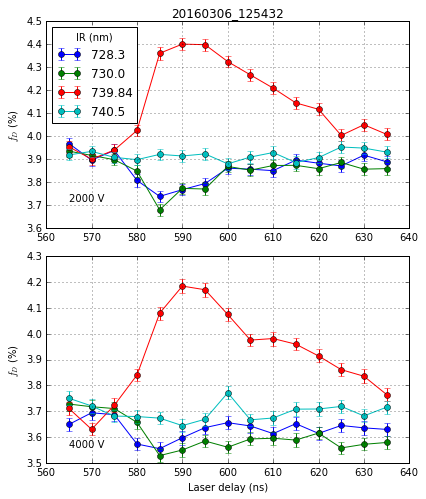

In [59]:
X = 'DLY_EA'
Y = 'DF_ra'
y_append = ''
y_rescale = 100.0
HV = [2000, 4000]
GroupBy = 'IR'
#plot setup
fig, ax = plt.subplots(2, 1, figsize=(6, 7))

#plot
for i, voltage in enumerate(HV):
    data = allDF[allDF['VOL_u100'] == voltage]
    grp = data.groupby(GroupBy)
    for name, group in grp:
        sg = group.sort_values(by=X)
        x = sg[X].values * 1e9
        y = sg[Y+'_mean'+y_append].values * y_rescale
        yerr = sg[:][Y+'_sem'+y_append].values * y_rescale
        ax[i].errorbar(x, y, yerr=yerr, fmt ='o-', label=name)
        ax[i].grid(True)
        ax[i].set_ylabel(r"$f_{D}$ (%)")
    ycoord = data['DF_ra_mean'].min() + 0.05 * (data['DF_ra_mean'].max() - data['DF_ra_mean'].min())
    ax[i].text(565, y_rescale * ycoord, str(voltage) + ' V')

#format
ax[0].legend(title='IR (nm)', loc=0)

#labels
ax[1].set_xlabel(r"Laser delay (ns)")
ax[0].set_title(rid)

#save data
plt.tight_layout()
fileout = os.path.join(out_dire, "Delay_DF_ra" + y_append + ".png")
plt.savefig(fileout, dpi=300)
plt.show()

## Signal

In [17]:
#calculate signal for each voltage
back = allDF[(allDF[X] > 640e-9) | (allDF[X] < 575e-9)][Y+'_mean'+y_append] #define background
bk = back.mean()
bk_sem = back.std()/np.sqrt(back.count())
sig = sspals.signal(allDF[Y+'_mean'+y_append].values, allDF[Y+'_sem'+y_append].values, bk, bk_sem)
allDF['S'] = sig[0]
allDF['S_err'] = sig[1]

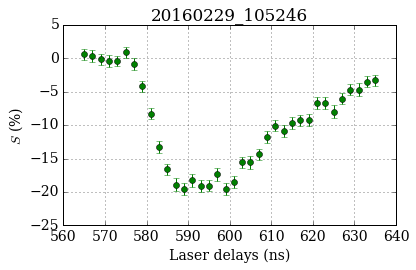

In [36]:
#plot setup
fig, ax = plt.subplots()

#plot
x = allDF[:][X].values * 1e9
y = allDF[:]['S'].values
yerr = allDF[:]['S_err'].values
ax.errorbar(x, y, yerr=yerr, fmt ='o', c='g')
    
#format
ax.set_ylabel(r"$S$ (%)")
ax.set_xlabel(r"Laser delays (ns)")
ax.grid(True)

plt.title(rid)
plt.tight_layout()

#save data
fileout = os.path.join(out_dire, "Delay_S.png")
plt.savefig(fileout, dpi=300)
plt.show()

# Posh plot

In [34]:
from matplotlib.ticker import MultipleLocator
#Use latex fonts, set default fontsize
plt.rc('text', usetex=False)
plt.rc('font', family='serif', size=14)
#set labelsize
LBLS = 16

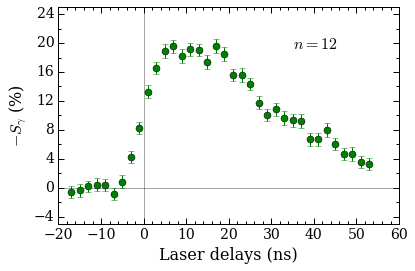

In [55]:
#plot setup
fig, ax = plt.subplots(figsize=(6, 4))

ax.axhline(0, c='k', alpha=0.7, lw=0.5)
ax.axvline(0, c='k', alpha=0.7, lw=0.5)

#plot
x = allDF[:][X].values * 1e9 - 582.0
y = -allDF[:]['S'].values
yerr = allDF[:]['S_err'].values
ax.errorbar(x, y, yerr=yerr, fmt ='o', c='g', ms=7)
    
#format
ax.set_ylabel(r"$-S_\gamma$ (%)", fontsize=LBLS)
ax.set_xlabel(r"Laser delays (ns)", fontsize=LBLS)

ax.tick_params(axis='both', which='major', length=6, width=1)
ax.tick_params(axis='both', which='minor', length=3, width=1)

majorLocator = MultipleLocator(10)
minorLocator = MultipleLocator(2)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)

majorLocator = MultipleLocator(4)
minorLocator = MultipleLocator(2)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)

fig.text(0.75, 0.8, '$n=12$', ha='center', fontsize=LBLS, family ='serif')

#save data
plt.tight_layout()
fileout = os.path.join('C:\Users\Adam\Documents\GitHub\Rydberg\Rydberg_decay', "delay.pdf")
plt.savefig(fileout, dpi=300)
plt.show()